# Maestría en Maestría en Ciencia de Datos e Inteligencia Artificial
#### 8. Machine Learning and Deep Learning
#### Docente: Msc. Renzo Claure Aracena.

### Evaluación de la regresión

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, root_mean_squared_error
from sklearn.dummy import DummyRegressor

In [3]:
atrib = pd.read_csv('../datasets/attributes.csv')
base = pd.read_csv('../datasets/communities.data', names = atrib['attributes'])

In [4]:
base.head()

,state,county,community,communityname,fold,population,householdsize,racepctblack,racePctWhite,racePctAsian,...,LandArea,PopDens,PctUsePubTrans,PolicCars,PolicOperBudg,LemasPctPolicOnPatr,LemasGangUnitDeploy,LemasPctOfficDrugUn,PolicBudgPerPop,ViolentCrimesPerPop
0,8,?,?,Lakewoodcity,1,0.19,0.33,0.02,0.90,0.12,...,0.12,0.26,0.20,0.06,0.04,0.9,0.5,0.32,0.14,0.20
1,53,?,?,Tukwilacity,1,0.00,0.16,0.12,0.74,0.45,...,0.02,0.12,0.45,?,?,?,?,0.00,?,0.67
2,24,?,?,Aberdeentown,1,0.00,0.42,0.49,0.56,0.17,...,0.01,0.21,0.02,?,?,?,?,0.00,?,0.43
3,34,5,81440,Willingborotownship,1,0.04,0.77,1.00,0.08,0.12,...,0.02,0.39,0.28,?,?,?,?,0.00,?,0.12
4,42,95,6096,Bethlehemtownship,1,0.01,0.55,0.02,0.95,0.09,...,0.04,0.09,0.02,?,?,?,?,0.00,?,0.03


In [6]:
base.shape

(1994, 128)

In [7]:
base = base.drop(columns=['state','county','community','communityname','fold'], axis=1)
base.head()
from pandas import DataFrame
base = base.replace('?', np.nan)
columnas_na = base.columns[base.isna().any()].tolist()
#base.fillna(base[columnas_na].median(),inplace=True)
base = base.dropna(axis=1)

In [8]:
base.head()

,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,agePct16t24,agePct65up,...,PctForeignBorn,PctBornSameState,PctSameHouse85,PctSameCity85,PctSameState85,LandArea,PopDens,PctUsePubTrans,LemasPctOfficDrugUn,ViolentCrimesPerPop
0,0.19,0.33,0.02,0.90,0.12,0.17,0.34,0.47,0.29,0.32,...,0.12,0.42,0.50,0.51,0.64,0.12,0.26,0.20,0.32,0.20
1,0.00,0.16,0.12,0.74,0.45,0.07,0.26,0.59,0.35,0.27,...,0.21,0.50,0.34,0.60,0.52,0.02,0.12,0.45,0.00,0.67
2,0.00,0.42,0.49,0.56,0.17,0.04,0.39,0.47,0.28,0.32,...,0.14,0.49,0.54,0.67,0.56,0.01,0.21,0.02,0.00,0.43
3,0.04,0.77,1.00,0.08,0.12,0.10,0.51,0.50,0.34,0.21,...,0.19,0.30,0.73,0.64,0.65,0.02,0.39,0.28,0.00,0.12
4,0.01,0.55,0.02,0.95,0.09,0.05,0.38,0.38,0.23,0.36,...,0.11,0.72,0.64,0.61,0.53,0.04,0.09,0.02,0.00,0.03


In [9]:
X = base.iloc[:, 0:99]
y = base.iloc[:, 99]

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)
lm = LinearRegression().fit(X_train, y_train)
lm_dummy_mean = DummyRegressor(strategy = 'mean').fit(X_train, y_train)

y_predict = lm.predict(X_test)
y_predict_dummy_mean = lm_dummy_mean.predict(X_test)

print('Coheficientes del modelo: ', lm.coef_)
print("Error cuadratico medio (dummy): {:.6f}".format(mean_squared_error(y_test, y_predict_dummy_mean)))
print("Error cuadratico medio (Modelos lineal): {:.6f}".format(mean_squared_error(y_test, y_predict)))
print("r2_score (dummy): {:.2f}".format(r2_score(y_test, y_predict_dummy_mean)))
print("r2_score (modelos lineal): {:.2f}".format(r2_score(y_test, y_predict)))

Coheficientes del modelo:  [ 3.62682184e-01  5.03405695e-02  2.30799267e-01 -1.88429893e-02
 -3.38496678e-02  7.06751018e-02  1.16281949e-01 -2.54623455e-01
 -1.37136855e-01  7.74465046e-02 -4.51342398e-01  5.54693746e-02
 -2.60980473e-01 -1.34812700e-01  4.03178977e-02 -1.88153209e-01
  1.17043609e-01  8.64413153e-02 -8.21061065e-02  3.01612528e-01
  7.28579753e-02 -2.61476862e-01 -1.54488741e-02 -3.30191055e-02
  3.05403559e-02  3.74397343e-02  5.84810877e-02 -2.00878544e-01
 -1.00815326e-01  2.57611986e-02  3.35457607e-02  1.59887681e-02
  2.97407163e-01 -9.66238251e-02 -4.99190080e-02  1.33563984e-01
  1.25287121e-01  3.25824091e-01  2.06268326e-01 -7.42297656e-02
 -2.57160045e-01 -1.19912375e-01 -1.55381954e-01 -2.51476307e-01
  3.43595317e-02 -7.66545567e-03  9.27600198e-02 -2.40030138e-01
 -1.35884227e-01  1.05042013e-01 -8.92508969e-02 -2.90012778e-02
  1.22439171e-01 -1.15714072e-01  6.00945194e-02  3.66020817e-02
 -2.87416012e-01  6.71735225e-01 -3.90713853e-01 -1.14327385e-0

Error cuadratico medio (dummy): 0.054740
r2_score (dummy): -0.00
Error cuadratico medio (Modelo lineal): 0.031125
r2_score (modelo lineal): 0.43


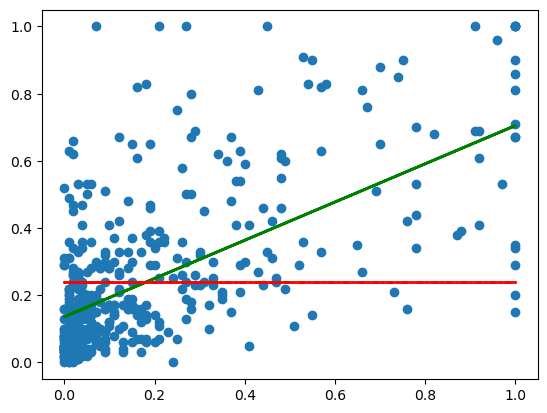

In [11]:
X_train, X_test, y_train, y_test = train_test_split(base[['racepctblack']], base['ViolentCrimesPerPop'], random_state = 0)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

lm = LinearRegression().fit(X_train, y_train)
lm_dummy_mean = DummyRegressor(strategy = 'mean').fit(X_train, y_train)


y_predict = lm.predict(X_test)
y_predict_dummy_mean = lm_dummy_mean.predict(X_test)


print("Error cuadratico medio (dummy): {:.6f}".format(mean_squared_error(y_test, y_predict_dummy_mean)))
print("r2_score (dummy): {:.2f}".format(r2_score(y_test, y_predict_dummy_mean)))
print("Error cuadratico medio (Modelo lineal): {:.6f}".format(mean_squared_error(y_test, y_predict)))
print("r2_score (modelo lineal): {:.2f}".format(r2_score(y_test, y_predict)))

plt.scatter(X_test, y_test)
plt.plot(X_test, y_predict, color='green', linewidth=2)
plt.plot(X_test, y_predict_dummy_mean, color='red', linestyle = 'dashed', linewidth=2, label = 'dummy')
plt.show()

In [12]:
print("Raiz del error cuadratico medio (Modelo lineal): {:.6f}".format(root_mean_squared_error(y_test, y_predict)))

Raiz del error cuadratico medio (Modelo lineal): 0.176423


In [13]:
y_train.head()

538     0.07
526     0.25
1477    0.41
1187    0.45
1125    0.71
Name: ViolentCrimesPerPop, dtype: float64